In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')


In [ ]:
df['stress_level'] = df['Stress Level'].apply(
    lambda x: 'high' if x > df['Stress Level'].median() else 'low'
)
df['activity_level'] = df['Physical Activity Level'].apply(
    lambda x: 'high' if x > df['Physical Activity Level'].median() else 'low'
)

df['sleep_quality_level'] = df['Quality of Sleep'].apply(
    lambda x: 'good' if x > df['Quality of Sleep'].median() else 'poor'
)
df['sleep_duration_level'] = df['Sleep Duration'].apply(
    lambda x: 'high' if x > df['Sleep Duration'].median() else 'low'
)

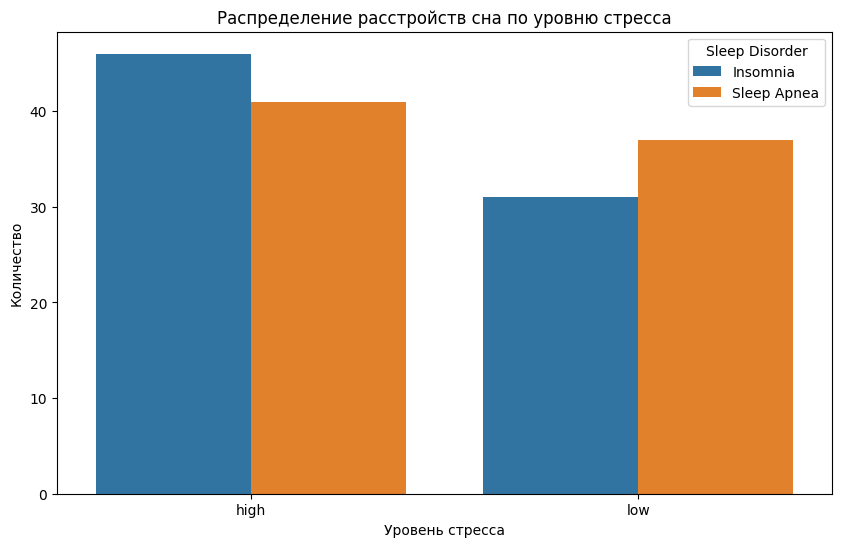

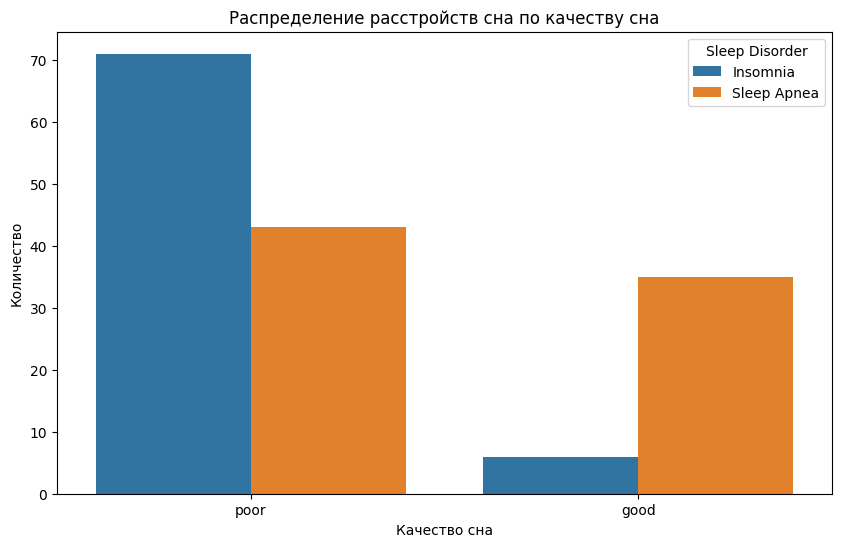

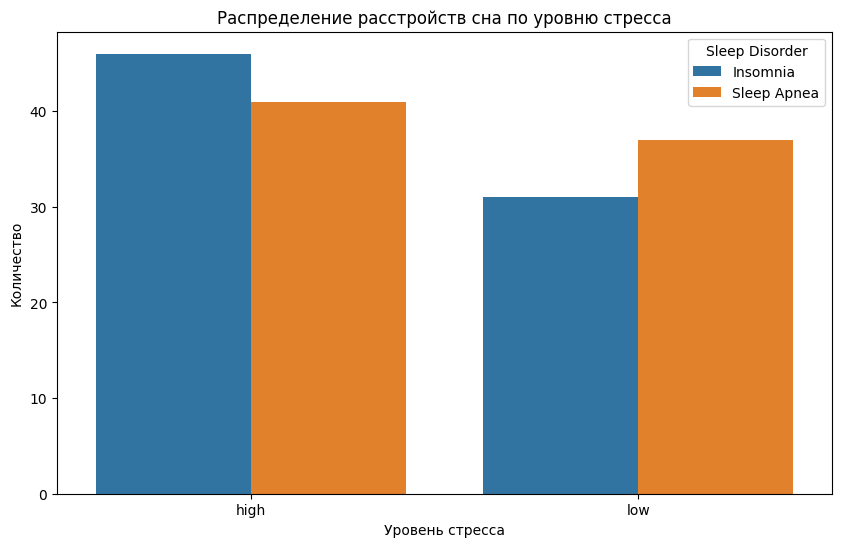

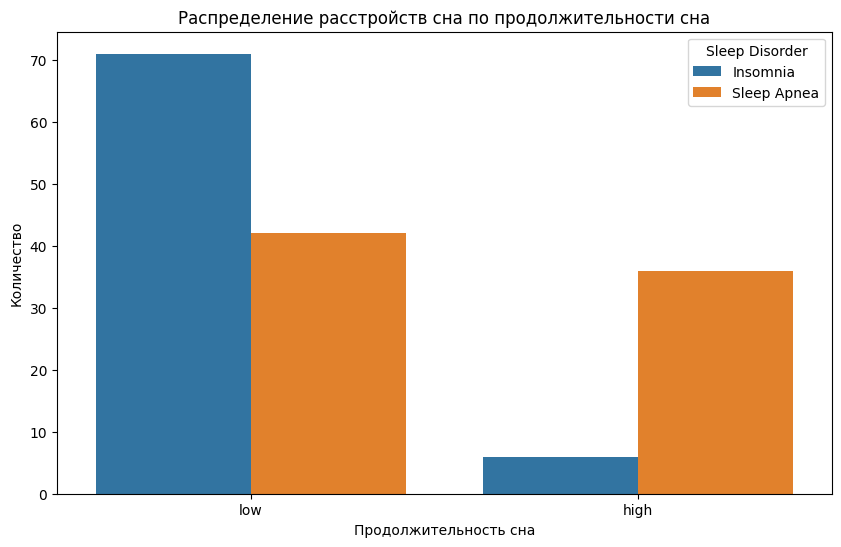

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stress_level', hue='Sleep Disorder')
plt.title('Распределение расстройств сна по уровню стресса')
plt.xlabel('Уровень стресса')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sleep_quality_level', hue='Sleep Disorder')
plt.title('Распределение расстройств сна по качеству сна')
plt.xlabel('Качество сна')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stress_level', hue='Sleep Disorder')
plt.title('Распределение расстройств сна по уровню стресса')
plt.xlabel('Уровень стресса')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sleep_duration_level', hue='Sleep Disorder')
plt.title('Распределение расстройств сна по продолжительности сна')
plt.xlabel('Продолжительность сна')
plt.ylabel('Количество')
plt.show()


Распределение целевой переменной:
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64




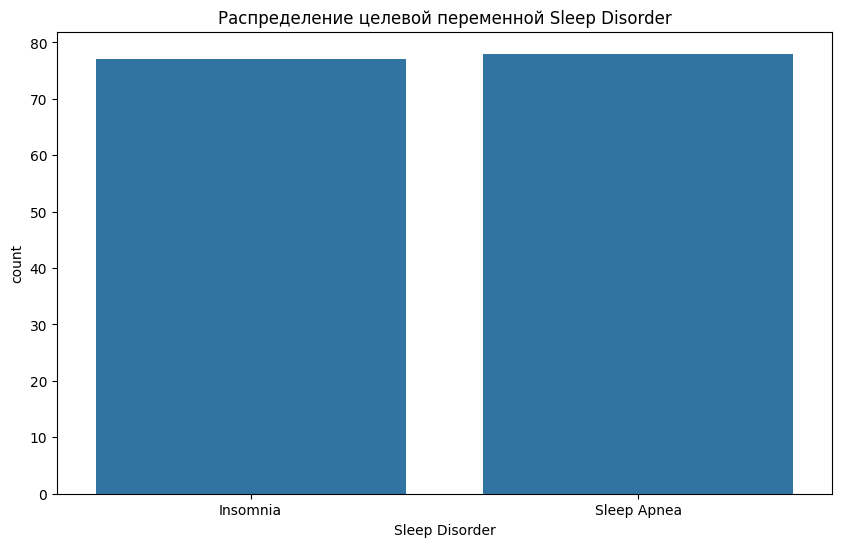

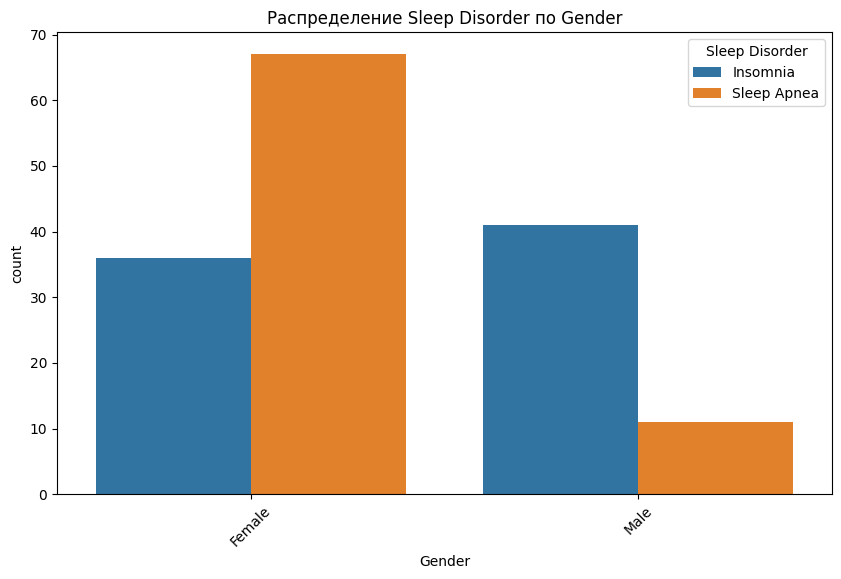

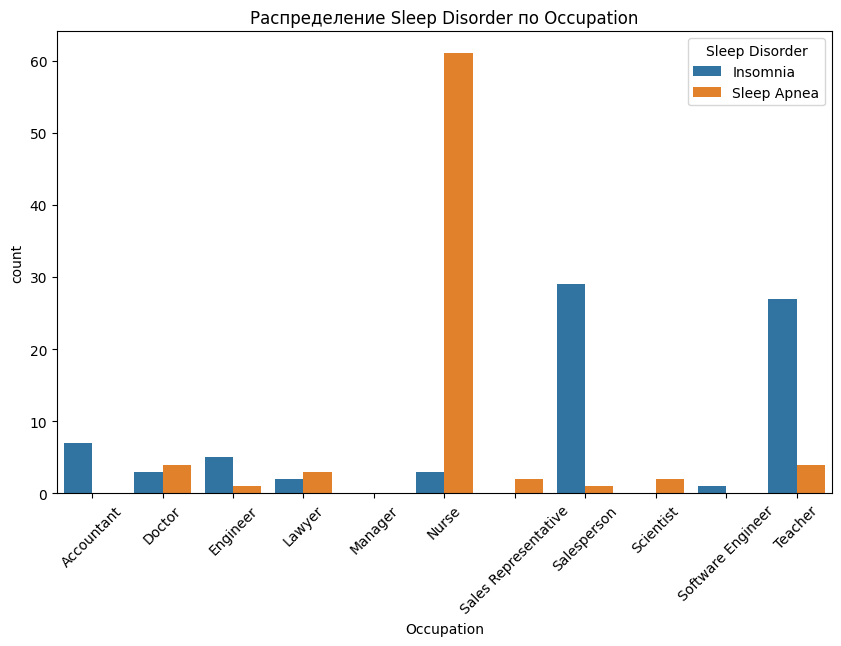

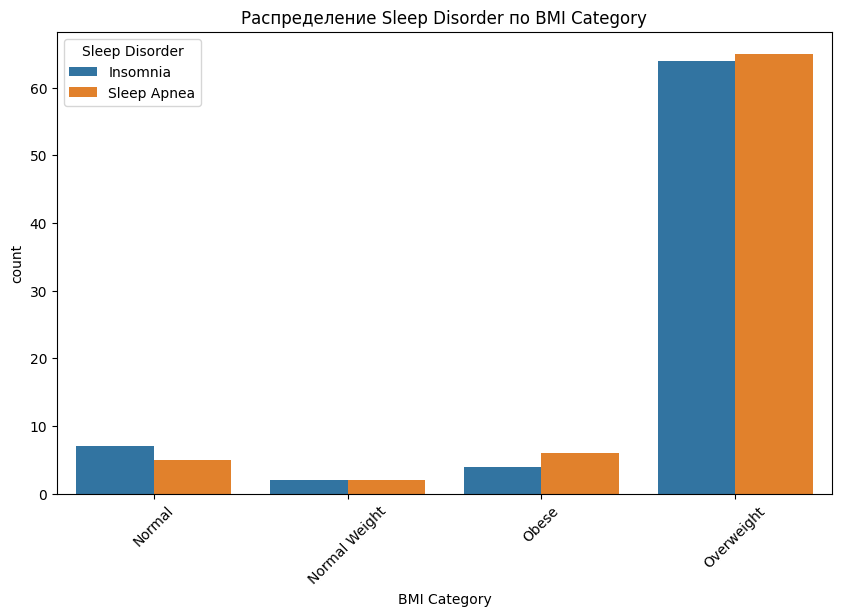

In [ ]:
# 1. Выбор целевой переменной
target_variable = 'Sleep Disorder'
print("Распределение целевой переменной:")
print(df[target_variable].value_counts())
print("\n")

# 2. EDA для номинальных переменных
nominal_variables = ['Gender', 'Occupation', 'BMI Category']
# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=target_variable)
plt.title('Распределение целевой переменной Sleep Disorder')
plt.show()


# Визуализация связей между номинальными переменными и целевой
for var in nominal_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var, hue=target_variable)
    plt.title(f'Распределение {target_variable} по {var}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Таблица для уровня стресса и расстройств сна
table_stress = pd.crosstab(df['stress_level'], df['Sleep Disorder'])
table_stress

Sleep Disorder,Insomnia,Sleep Apnea
stress_level,,
high,46,41
low,31,37


In [ ]:
# Таблица для уровня физической активности и расстройств сна
table_activity = pd.crosstab(df['activity_level'], df['Sleep Disorder'])
table_activity

Sleep Disorder,Insomnia,Sleep Apnea
activity_level,,
high,6,63
low,71,15


In [ ]:
# Таблица для качества сна и расстройств сна
table_sleep_quality = pd.crosstab(df['sleep_quality_level'], df['Sleep Disorder'])
table_sleep_quality

Sleep Disorder,Insomnia,Sleep Apnea
sleep_quality_level,,
good,6,35
poor,71,43


In [ ]:
# Таблица для продолжительности сна и расстройств сна
table_duration = pd.crosstab(df['sleep_duration_level'], df['Sleep Disorder'])
table_duration

Sleep Disorder,Insomnia,Sleep Apnea
sleep_duration_level,,
high,6,36
low,71,42


In [ ]:
#Таблица для Occupation и Sleep Disorder
table_occupation = pd.crosstab(df['Occupation'], df['Sleep Disorder'])
table_occupation

Sleep Disorder,Insomnia,Sleep Apnea
Occupation,,
Accountant,7,0
Doctor,3,4
Engineer,5,1
Lawyer,2,3
Nurse,3,61
Sales Representative,0,2
Salesperson,29,1
Scientist,0,2
Software Engineer,1,0


In [ ]:
#Таблица для BMI Category и Sleep Disorder
table_bmi = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
table_bmi

Sleep Disorder,Insomnia,Sleep Apnea
BMI Category,,
Normal,7,5
Normal Weight,2,2
Obese,4,6
Overweight,64,65


In [ ]:
#Таблица для Gender и Sleep Disorder
table_gender = pd.crosstab(df['Gender'], df['Sleep Disorder'])
table_gender

Sleep Disorder,Insomnia,Sleep Apnea
Gender,,
Female,36,67
Male,41,11


In [ ]:
# Анализ зависимостей между номинальными переменными (chi2)
print("Анализ зависимостей между номинальными переменными:")
for var in nominal_variables:
    contingency_table = pd.crosstab(df[var], df[target_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var} vs {target_variable}: chi2={chi2:.3f}, p-value={p:.5f}")
    if p < 0.05:
        print(f"  → Зависимость есть(значимая)")
    else:

        print(f"  → Зависимость не доказана")

Анализ зависимостей между номинальными переменными:
Gender vs Sleep Disorder: chi2=24.906, p-value=0.00000
  → Зависимость есть(значимая)
Occupation vs Sleep Disorder: chi2=110.768, p-value=0.00000
  → Зависимость есть(значимая)
BMI Category vs Sleep Disorder: chi2=0.735, p-value=0.86502
  → Зависимость не доказана


In [ ]:
print("Анализ зависимостей между числовыми переменными и целевой:")
binary_variables = ['activity_level', 'sleep_quality_level', 'stress_level', 'sleep_duration_level']

for var in binary_variables:
    contingency_table = pd.crosstab(df[var], df[target_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var} vs {target_variable}: chi2={chi2:.3f}, p-value={p:.5f}")
    if p < 0.05:
        print(f"  → Зависимость есть(значимая)")
    else:

        print(f"  → Зависимость не доказана")


Анализ зависимостей между числовыми переменными и целевой:
activity_level vs Sleep Disorder: chi2=80.621, p-value=0.00000
  → Зависимость есть(значимая)
sleep_quality_level vs Sleep Disorder: chi2=25.511, p-value=0.00000
  → Зависимость есть(значимая)
stress_level vs Sleep Disorder: chi2=0.545, p-value=0.46032
  → Зависимость не доказана
sleep_duration_level vs Sleep Disorder: chi2=26.957, p-value=0.00000
  → Зависимость есть(значимая)


In [ ]:
best_features = ['sleep_quality_level']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Берем только числовые признаки
df = df.dropna(subset=['Sleep Disorder'])
num_cols = df.select_dtypes(include='number').columns.tolist() + ['Sleep Disorder']
X = df[num_cols].drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 1. Модель без нормализации ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw) # точность

# --- 2. Модель после нормализации ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled) # точность

acc_raw, acc_scaled



(0.851063829787234, 0.851063829787234)

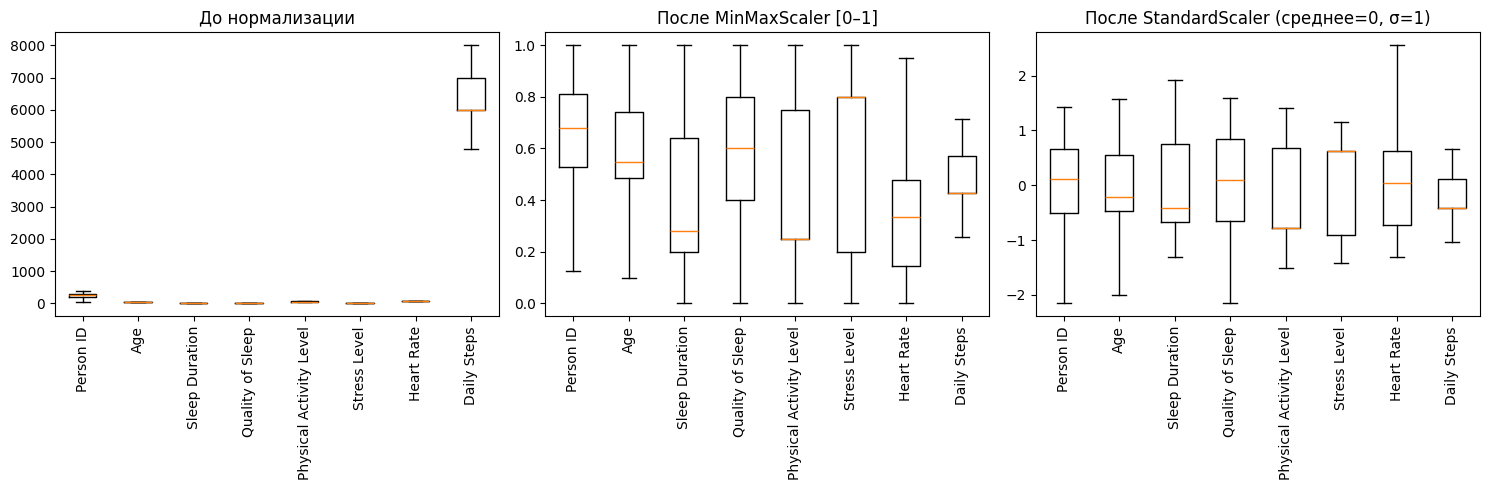

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Берем все числовые признаки
num_df = df.select_dtypes(include=['int64', 'float64']).copy()

# --- Применяем два метода нормализации ---
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(num_df), columns=num_df.columns)
std_scaled = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)

# --- Визуализация ---
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].boxplot(num_df.values, showfliers=False)
axes[0].set_title("До нормализации")
axes[0].set_xticks(range(1, len(num_df.columns)+1))
axes[0].set_xticklabels(num_df.columns, rotation=90)

axes[1].boxplot(minmax_scaled.values, showfliers=False)
axes[1].set_title("После MinMaxScaler [0–1]")
axes[1].set_xticks(range(1, len(num_df.columns)+1))
axes[1].set_xticklabels(num_df.columns, rotation=90)

axes[2].boxplot(std_scaled.values, showfliers=False)
axes[2].set_title("После StandardScaler (среднее=0, σ=1)")
axes[2].set_xticks(range(1, len(num_df.columns)+1))
axes[2].set_xticklabels(num_df.columns, rotation=90)

plt.tight_layout()
plt.show()

### Model

In [ ]:
df = df.dropna(subset=['Sleep Disorder'])
y = df['Sleep Disorder']
x = df[best_features]

In [ ]:
model = LogisticRegression(
    penalty=None, # регуляризация (добавление штрафа за большие коэфициенты)
    random_state=42,
    max_iter=1000,
    multi_class='multinomial'
)


In [ ]:
X = df.drop(['Sleep Disorder', 'Person ID'], axis=1)
y = df['Sleep Disorder']

# Разделяем на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category', 'object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [ ]:

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'stress_level', 'activity_level', 'sleep_quality_level',
       'sleep_duration_level'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.05541634, 0.94458366],
       [0.9714423 , 0.0285577 ],
       [0.04284232, 0.95715768],
       [0.96187225, 0.03812775],
       [0.03292555, 0.96707445],
       [0.91650705, 0.08349295],
       [0.05541634, 0.94458366],
       [0.97064538, 0.02935462],
       [0.96187225, 0.03812775],
       [0.03292555, 0.96707445],
       [0.22669232, 0.77330768],
       [0.96747095, 0.03252905],
       [0.96976934, 0.03023066],
       [0.45804124, 0.54195876],
       [0.9714423 , 0.0285577 ],
       [0.04284232, 0.95715768],
       [0.20592003, 0.79407997],
       [0.03858978, 0.96141022],
       [0.03858978, 0.96141022],
       [0.96835124, 0.03164876],
       [0.04791916, 0.95208084],
       [0.96187225, 0.03812775],
       [0.50186065, 0.49813935],
       [0.04271895, 0.95728105],
       [0.61809277, 0.38190723],
       [0.96187225, 0.03812775],
       [0.51283869, 0.48716131],
       [0.31430275, 0.68569725],
       [0.96187225, 0.03812775],
       [0.50072605, 0.49927395],
       [0.

In [ ]:
for i in range(10):
  print([round(float(item), 2) for item in list(y_pred_proba[i] * 100)])

[5.54, 94.46]
[97.14, 2.86]
[4.28, 95.72]
[96.19, 3.81]
[3.29, 96.71]
[91.65, 8.35]
[5.54, 94.46]
[97.06, 2.94]
[96.19, 3.81]
[3.29, 96.71]


In [ ]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)


In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    roc_auc = None
    if y_proba is not None:
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("Метрики классификации")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }



In [ ]:
metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

=== Метрики классификации ===
Accuracy:  0.9355
Precision: 0.9359
Recall:    0.9355
F1-score:  0.9355
ROC-AUC:   0.9775

Confusion Matrix:
[[59  3]
 [ 5 57]]


Accuracy (Точность): 0.9355

Модель правильно классифицирует 93.55% всех случаев.

Precision (Точность): 0.9359

Из всех предсказанных положительных случаев 93.59% действительно положительные.

Модель редко ошибается, предсказывая положительный класс. Только 3 из 60 положительных предсказаний неверны

Recall (Полнота): 0.9355

Модель правильно идентифицировала 93.55% всех реальных положительных примеров.

Модель хорошо находит положительные примеры.

Пропускает только 5 из 62 реальных положительных случаев

F1-score (F-мера): 0.9355

Гармоническое среднее между precision и recall.

ROC-AUC: 0.9775

Площадь под ROC-кривой. Значение близкое к 1 говорит о том, что модель очень хорошо разделяет классы.

True Negative (TN) = 59 - правильно предсказанные отрицательные случаи

False Positive (FP) = 3 - ложно-положительные

False Negative (FN) = 5 - ложно-отрицательные

True Positive (TP) = 57 - правильно предсказанные положительные случаи

In [ ]:
metrics = evaluate_classification(y_test, y_pred, y_proba)


=== Метрики классификации ===
Accuracy:  0.8710
Precision: 0.8777
Recall:    0.8710
F1-score:  0.8707
ROC-AUC:   0.9427

Confusion Matrix:
[[14  1]
 [ 3 13]]


Accuracy: 0.8710.

Модель правильно классифицирует 87.1% случаев. Это хороший, но не выдающийся результат.

Precision (0.8777)
Из всех предсказанных положительных случаев 87.77% действительно положительные

Всего 1 ложное срабатывание из 14 положительных предсказаний

Recall (0.8710)
Модель находит 87.1% всех реальных положительных случаев

Пропускает 3 из 16 реальных положительных случаев

F1-score (0.8707)
Сбалансированный показатель между Precision и Recall

ROC-AUC (0.9427)
Очень хороший показатель - модель хорошо разделяет классы

True Negative (TN) = 14

False Positive (FP) = 1

False Negative (FN) = 3

True Positive (TP) = 13

